In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('chowdary.csv', index_col=0)

y = data['tumour']
X = data.drop('tumour', axis=1)

### Analysis

In [14]:
data_top3 = X.copy()

data_top3['tumour'] = y.values

In [15]:
%matplotlib inline

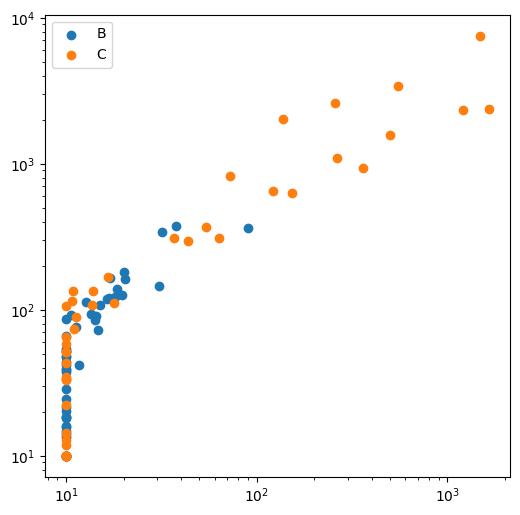

In [16]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

# ax = fig.add_subplot(111, projection='3d')
plt.xscale('log')
plt.yscale('log')

for s in data_top3.tumour.unique():
    plt.scatter(data_top3[data_top3.tumour==s].iloc[:,2], data_top3[data_top3.tumour==s].iloc[:,3], label=s)

plt.legend()
plt.show()

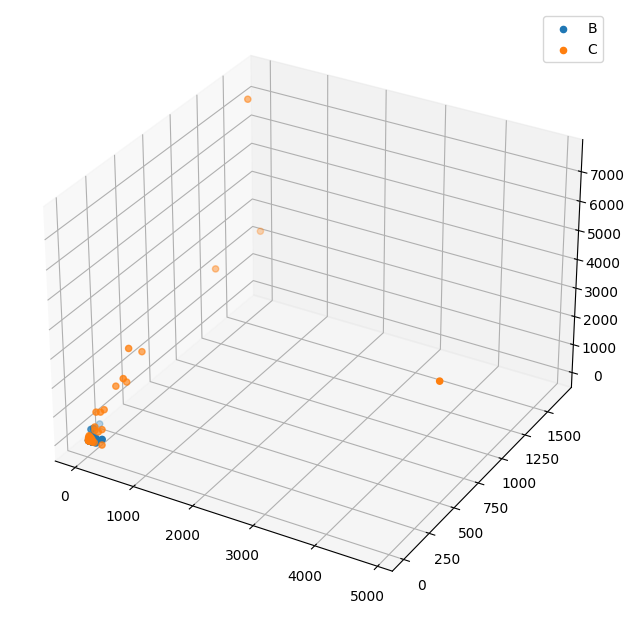

In [17]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# ax = fig.add_subplot(111, projection='3d')

for s in data_top3.tumour.unique():
    ax.scatter(data_top3[data_top3.tumour==s].iloc[:,1], data_top3[data_top3.tumour==s].iloc[:,2], data_top3[data_top3.tumour==s].iloc[:,3], label=s)

ax.legend()

In [18]:
%matplotlib notebook

## PCA

<IPython.core.display.Javascript object>


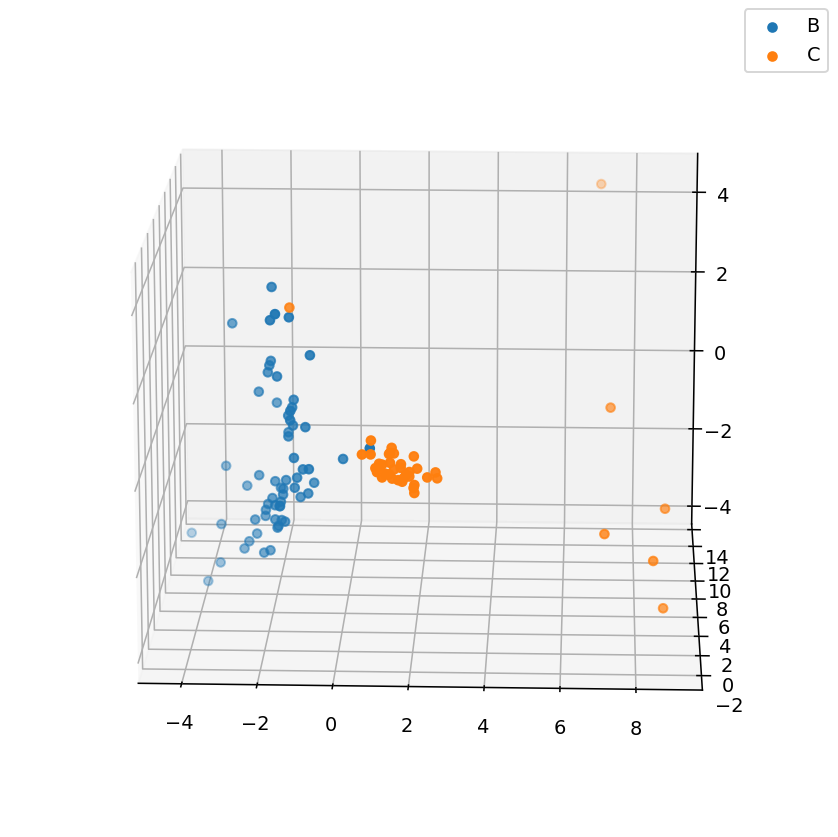

In [20]:
# Select the features based on non-zero coefficient values
selected_features = coeff_df[coeff_df['Coefficient'] != 0]['Variable'].values

# Create a new DataFrame with only the selected features and the target variable
data_selected = data.loc[:, ['tumour'] + list(selected_features)]

# Standardize the selected features
X_selected = scaler.fit_transform(data_selected.drop('tumour', axis=1))

# Perform PCA on the standardized features
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_selected)

df_pca=pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

df_pca['tumour'] = data['tumour'].values.copy()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# ax = fig.add_subplot(111, projection='3d')

for s in df_pca.tumour.unique():
    ax.scatter(df_pca[df_pca.tumour==s].iloc[:,0], df_pca[df_pca.tumour==s].iloc[:,1], df_pca[df_pca.tumour==s].iloc[:,2], label=s)

ax.legend()


In [21]:
pca.explained_variance_ratio_

array([0.29177564, 0.17825643, 0.09926978])

## t-SNE

<IPython.core.display.Javascript object>


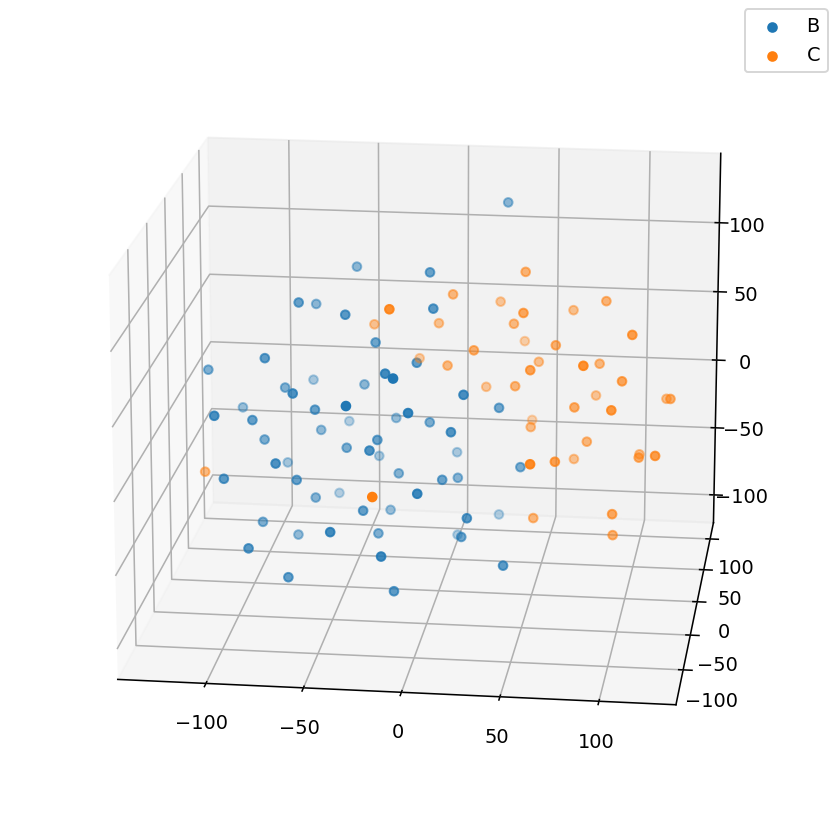

In [22]:
# Select the features based on non-zero coefficient values
selected_features = coeff_df[coeff_df['Coefficient'] != 0]['Variable'].values

# Create a new DataFrame with only the selected features and the target variable
data_selected = data.loc[:, ['tumour'] + list(selected_features)]

# Standardize the selected features
X_selected = scaler.fit_transform(data_selected.drop('tumour', axis=1))

# Perform t-SNE on the standardized features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

df_tsne=pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

df_tsne['tumour'] = data['tumour'].values.copy()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# ax = fig.add_subplot(111, projection='3d')

for s in df_tsne.tumour.unique():
    ax.scatter(df_tsne[df_tsne.tumour==s].iloc[:,0], df_tsne[df_tsne.tumour==s].iloc[:,1], df_tsne[df_tsne.tumour==s].iloc[:,2], label=s)

ax.legend()

## Umap

C:\Users\amita\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<IPython.core.display.Javascript object>


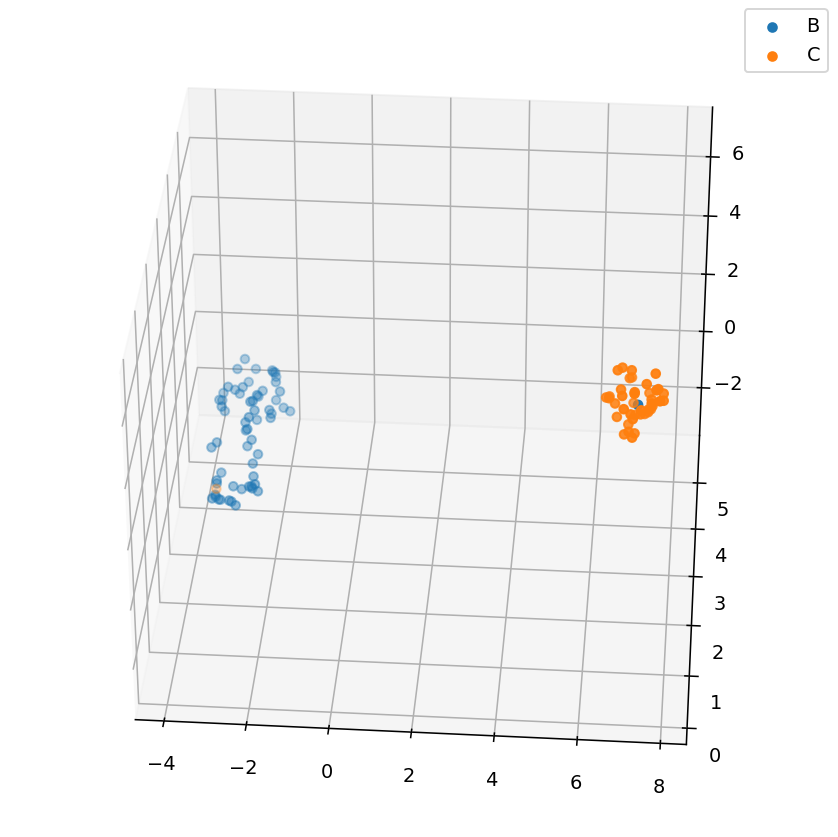

In [24]:
import umap.umap_ as umap

# Select the features based on non-zero coefficient values
selected_features = coeff_df[coeff_df['Coefficient'] != 0]['Variable'].values

# Create a new DataFrame with only the selected features and the target variable
data_selected = data.loc[:, ['tumour'] + list(selected_features)]

# Standardize the selected features
X_selected = scaler.fit_transform(data_selected.drop('tumour', axis=1))

# Perform UMAP on the standardized features
umap_ = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_.fit_transform(X_selected)

df_umap=pd.DataFrame(X_umap, columns=['umap1', 'umap2', 'umap3'])

df_umap['tumour'] = data['tumour'].values.copy()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# ax = fig.add_subplot(111, projection='3d')

for s in df_umap.tumour.unique():
    ax.scatter(df_umap[df_umap.tumour==s].iloc[:,0], df_umap[df_umap.tumour==s].iloc[:,1], df_umap[df_umap.tumour==s].iloc[:,2], label=s)

ax.legend()